In [3]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

# 0.熟悉决策树算法的属性和方法

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,export_graphviz 

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
X = iris.data[:,-2:]
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [172]:
tree_clf.apply(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4,
       4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [117]:
tree_clf.predict([[5.6,1.3,5.5,3.8]])

array([2])

# 1.树模型可视化展示

### 生成决策树文件'.dot'

In [129]:
dot_data = export_graphviz(tree_clf, out_file='iris_tree.dot', 
                feature_names=iris.feature_names,  
                class_names=iris.target_names,  
                filled=True, rounded=True,  
                special_characters=True)  


### 转换.dot文件为png图形文件
- 在命令行输入：dot -Tpng iris_tree.dot -o iris_tree.png

### 展示决策树图

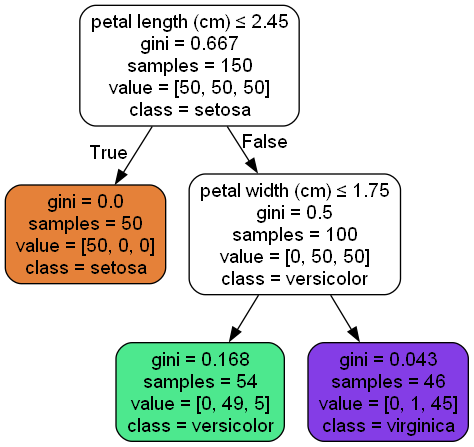

In [7]:
from IPython.display import Image
Image(filename='iris_tree.png',width=300,height=300)

# 2.决策树边界展示分析

### 决策边界完整代码（一）

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf,X,y,iris=True,legend=False,plot_training=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    axes = [mins[0],maxs[0],mins[1],maxs[1]]
    
    xls = np.linspace(axes[0],axes[1],100)
    x2s = np.linspace(axes[2],axes[3],100)
    x1,x2 = np.meshgrid(xls,x2s) 
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = tree_clf.predict(X_new).reshape(x1.shape)
    custom_cmap1 = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    # plt.contourf 绘制区域颜色
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap1)
    
    # plt.contour 绘制等高线 
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2,y_pred,alpha=0.8,cmap=custom_cmap2)
    if plot_training:
        plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',label='Iris-Setosa')
        plt.plot(X[:,0][y==1],X[:,1][y==1],'bs',label='Iris-Versicolor')
        plt.plot(X[:,0][y==2],X[:,1][y==2],'g^',label='Iris-Versicolor')
        plt.axis(axes)
    if iris:
        plt.xlabel('petal length',fontsize=14)
        plt.ylabel('petal width',fontsize=14)   
    else:
        plt.xlabel(r'$x_1$',fontsize=18)
        plt.ylabel(r'$x_2$',fontsize=18,rotation=0) 
    if legend:
        plt.legend(loc='lower right',fontsize=14)
      

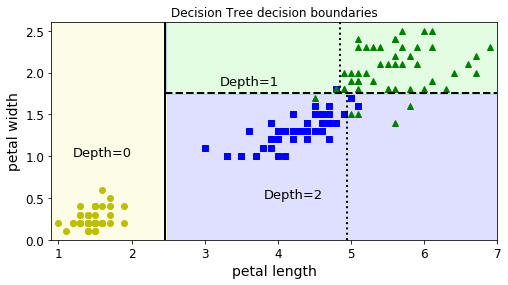

In [9]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf,X,y)
plt.plot([2.45,2.45],[0,3],'k-',linewidth=2)
plt.plot([2.45,7.5],[1.75,1.75],'k--',linewidth=2)
plt.plot([4.95,4.95],[0,1.75],'k:',linewidth=2)
plt.plot([4.85,4.85],[1.75,3],'k:',linewidth=2)  
plt.text(1.20,1.0,'Depth=0',fontsize=13)
plt.text(3.2,1.85,'Depth=1',fontsize=13)
plt.text(3.8,0.5,'Depth=2',fontsize=13)    
plt.title('Decision Tree decision boundaries')   

plt.show()  

### *决策边界完整代码（二）

In [10]:
from matplotlib.colors import ListedColormap

# 数据点
def plot_data(X):
    plt.plot(X[:,0],X[:,1],'k.',markersize=2)
 
         
# 决策边界
def plot_decision_boundaries(clf,X,y,iris=True,plot_training=True,legend=False):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    axes = [mins[0],maxs[0],mins[1],maxs[1]]
    
    
    x1,x2 = np.meshgrid(np.linspace(mins[0],maxs[0],100),
                        np.linspace(mins[1],maxs[1],100))
    X_new = np.c_[x1.ravel(),x2.ravel()] 
    y_pred = clf.predict(X_new).reshape(x1.shape)    
    
    # plt.contourf 绘制区域颜色
    custom_cmap1 = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap1)
    
    # plt.contour 绘制等高线 
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1,x2,y_pred,cmap=custom_cmap2)
        
    plot_data(X)
    
    if plot_training:
        plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',label='Iris-Setosa')
        plt.plot(X[:,0][y==1],X[:,1][y==1],'bs',label='Iris-Versicolor')
        plt.plot(X[:,0][y==2],X[:,1][y==2],'g^',label='Iris-Versicolor')
        plt.axis(axes)
    if iris:
        plt.title('Decision Tree decision boundaries')
        plt.xlabel('petal length',fontsize=14)
        plt.ylabel('petal width',fontsize=14)  
    else:
        plt.xlabel(r'$x_1$',fontsize=18)
        plt.ylabel(r'$x_2$',fontsize=18,rotation=0) 
    if legend:
        plt.legend(loc='lower right',fontsize=14)
    

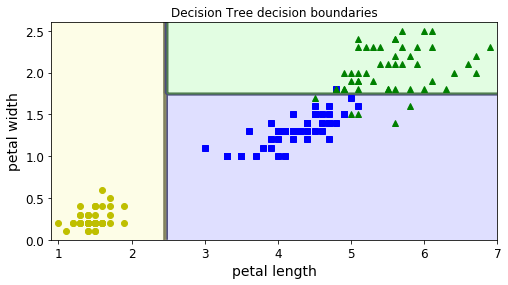

In [11]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(tree_clf,X,y)
plt.show()    

In [140]:
xls.shape

(100,)

In [141]:
x1.shape

(100, 100)

In [142]:
x1.ravel().shape

(10000,)

In [143]:
X_new.shape

(10000, 4)

In [145]:
y_pred.shape

(10000,)

# 3.决策树的正则化  

**DecisionTreeClassifier类**中有一些参数限制了决策树的形状：

- max_depth：树最大的深度
- min_samples_split：节点在分割之前必须具有的最小样本数
- min_samples_leaf：叶子节点必须具有的最小样本数
- max_leaf_nodes：叶子节点的最大数量
- max_features：在每个节点处评估用于拆分的最大特征数

Text(0.5, 1.0, 'max_depth=4')

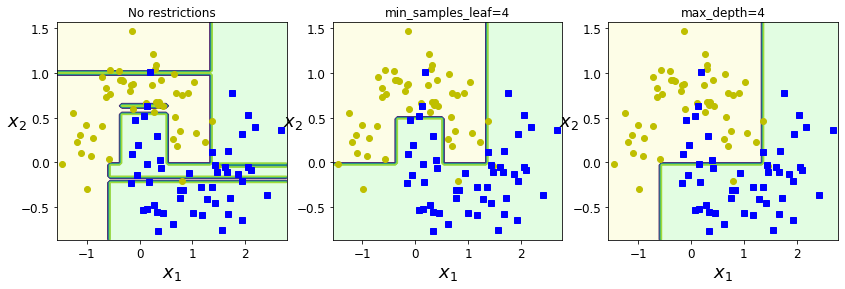

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise=0.25, random_state=42)
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4,random_state=42)
tree_clf3 = DecisionTreeClassifier(max_depth=4,random_state=42)

tree_clf1.fit(X, y)
tree_clf2.fit(X, y)
tree_clf3.fit(X, y)

plt.figure(figsize=(14,4))
plt.subplot(131)
plot_decision_boundaries(tree_clf1,X,y,iris=False)
plt.title('No restrictions')

plt.subplot(132)
plot_decision_boundaries(tree_clf2,X,y,iris=False)
plt.title('min_samples_leaf=4')

plt.subplot(133)
plot_decision_boundaries(tree_clf3,X,y,iris=False)
plt.title('max_depth=4')

### 决策树对数据的敏感程度

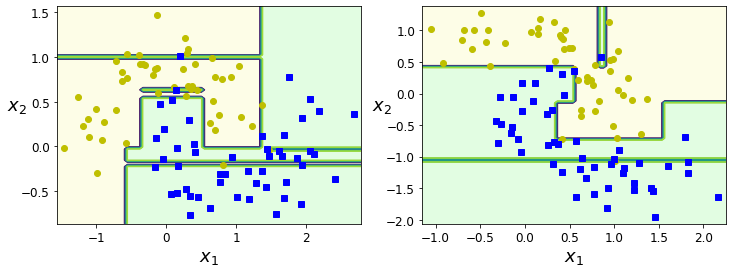

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

Xm,ym = make_moons(n_samples=100,noise=0.25, random_state=42)

angle = np.pi/4
rotation_matrix = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])
Xmr = Xm.dot(rotation_matrix )

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xm,ym)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xmr,ym)

plt.figure(figsize=(12,4))
plt.subplot(121)
plot_decision_boundaries(tree_clf_s,Xm,ym,iris=False)

plt.subplot(122)
plot_decision_boundaries(tree_clf_sr,Xmr,ym,iris=False)

plt.show()

# 4.回归树模型

In [145]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 

X,y = load_diabetes(return_X_y=True)
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [146]:
X.shape

(442, 10)

In [135]:
dot_data = export_graphviz(tree_reg, out_file='regression_tree.dot', 
                filled=True, rounded=True)  

In [ ]:
# dot -Tpng regression_tree.dot -o regression_tree.png

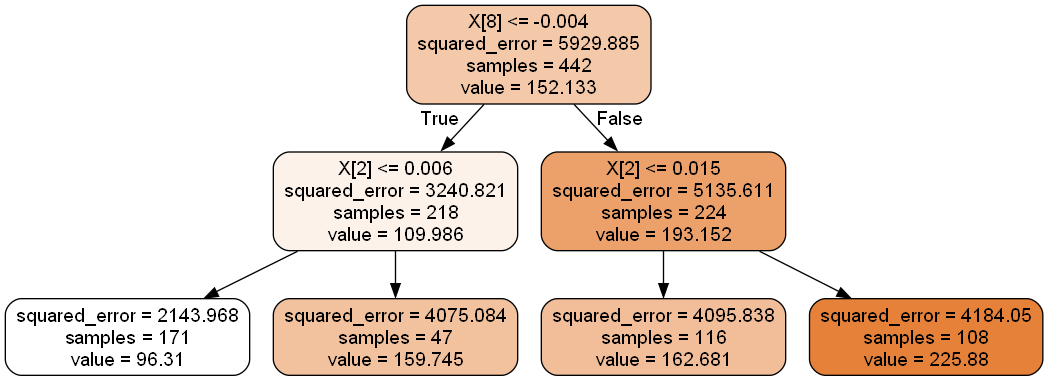

In [138]:
from IPython.display import Image
Image(filename='regression_tree.png',width=400,height=400)

In [205]:

X = load_diabetes().data[:,8]
y = load_diabetes().target

min_x = X.min(axis=0) 
max_x = X.max(axis=0) 
min_y = y.min(axis=0) 
max_y = y.max(axis=0) 
axes = [min_x,max_x,min_y,max_y]

x1 = np.linspace(min_x,max_x,100).reshape(-1,1)

y.shape

(442,)

[-0.126097385560409, 0.133598980013008, -0.0902752958985185, 0.17055522598066]


Text(0.5, 1.0, 'max_depth=3')

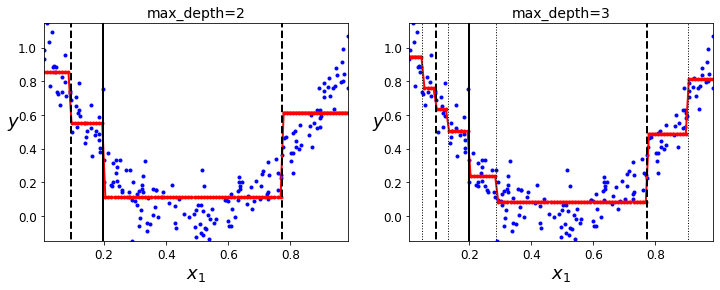

In [221]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

X = np.random.rand(200,1)
y = 4*(X-0.5)**2
y = y + np.random.randn(200,1)/10


tree_reg1 = DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg2 = DecisionTreeRegressor(max_depth=3,random_state=42)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg,X, y,ylabel=True):
    min_x = X.min(axis=0) 
    max_x = X.max(axis=0) 
    min_y = y.min(axis=0) 
    max_y = y.max(axis=0) 
    axes = [min_x,max_x,min_y,max_y]
    
    x1 = np.linspace(min_x,max_x,100).reshape(-1,1)   
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)

    
    plt.xlabel('$x_1$',fontsize=18)
    if ylabel:
        plt.ylabel('$y$',fontsize=18,rotation=0)
    plt.plot(X,y,'b.')
    plt.plot(x1,y_pred,'r.-',linewidth=2,label=r'$\hat{y}$')



plt.figure(figsize=(12,4))
plt.subplot(121)
plot_regression_predictions(tree_reg1,X,y)
for split,style in ((0.1973,'k-'),(0.0917,'k--'),(0.7718,'k--')):
    plt.plot([split,split],[-0.2,1.2],style,linewidth=2)
plt.title('max_depth=2',fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2,X,y)
for split,style in ((0.1973,'k-'),(0.0917,'k--'),(0.7718,'k--')):
    plt.plot([split,split],[-0.2,1.2],style,linewidth=2)
for split in (0.0458,0.1298,0.2873,0.9040):
    plt.plot([split,split],[-0.2,1.2],'k:',linewidth=1)
plt.title('max_depth=3',fontsize=14)


Text(0.5, 1.0, 'min_samples_leaf=10')

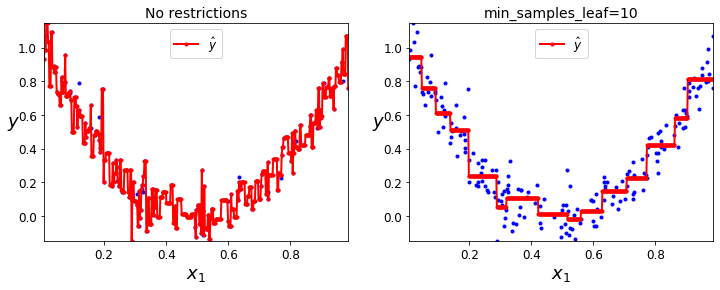

In [225]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

X = np.random.rand(200,1)
y = 4*(X-0.5)**2
y = y + np.random.randn(200,1)/10


tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(min_samples_leaf=10,random_state=42)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

min_x = X.min(axis=0) 
max_x = X.max(axis=0) 
min_y = y.min(axis=0) 
max_y = y.max(axis=0) 
axes = [min_x,max_x,min_y,max_y]

x1 = np.linspace(min_x,max_x,500).reshape(-1,1)   
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

def plot_data(X,y,axes):
    plt.plot(X,y,'b.')
    plt.xlabel('$x_1$',fontsize=18)
    plt.ylabel('$y$',fontsize=18,rotation=0)
    plt.axis(axes)

plt.figure(figsize=(12,4))
plt.subplot(121)
plot_data(X,y,axes)
plt.plot(x1,y_pred1,'r.-',linewidth=2,label=r'$\hat{y}$')
plt.legend(loc='upper center',fontsize=12)
plt.title('No restrictions',fontsize=14)

plt.subplot(122)
plot_data(X,y,axes)
plt.plot(x1,y_pred2,'r.-',linewidth=2,label=r'$\hat{y}$')
plt.legend(loc='upper center',fontsize=12)
plt.title('min_samples_leaf={}'.format(tree_reg2.min_samples_leaf),fontsize=14)